In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('International football results from 1872 to 2023/goalscorers.csv')

In [120]:
df['minute'] = pd.to_numeric(df['minute'], errors='coerce')
df = df.dropna(subset=['minute'])

In [121]:
df['first_goal_time'] = df.groupby(['date', 'home_team', 'away_team', 'team'])['minute'].transform('min')
df['first_goal_team'] = df.loc[df.groupby(['date', 'home_team', 'away_team', 'team'])['minute'].idxmin()]['team']

In [114]:
team_appearances = df.groupby(['date', 'home_team', 'away_team', 'team'])['team'].count().reset_index(
    name='appearances')

winning_teams = team_appearances.loc[
    team_appearances.groupby(['date', 'home_team', 'away_team'])['appearances'].idxmax()]

df['winning_team'] = np.where(df.set_index(['date', 'home_team', 'away_team', 'team']).index.isin(
    winning_teams.set_index(['date', 'home_team', 'away_team', 'team']).index), df['team'], 'Draw')

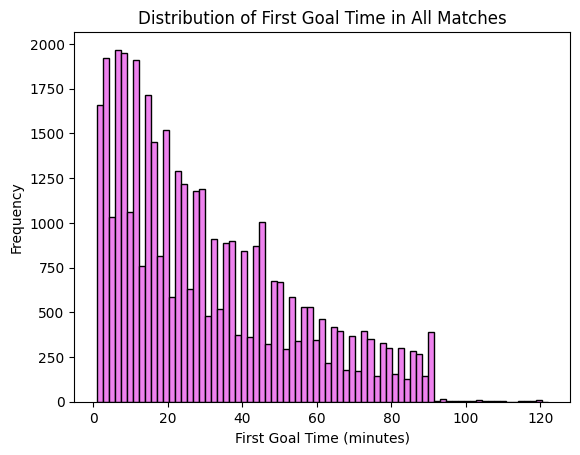

In [133]:
plt.hist(df['first_goal_time'].dropna(), bins=75, color='violet', edgecolor='black')
plt.xlabel('First Goal Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of First Goal Time in All Matches')
plt.show()

In [175]:
winning_ratio = len(df[df['winning_team'] == df['first_goal_team']]) / len(df[df['first_goal_team'].notna()])
losing_ratio = 1 - winning_ratio
ratios = [winning_ratio, losing_ratio]

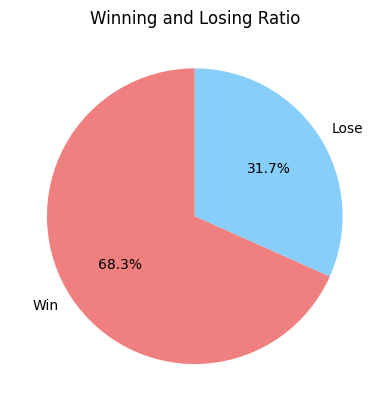

In [176]:
labels = ['Win', 'Lose']
colors = ['lightcoral', 'lightskyblue']
plt.pie(ratios, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Winning and Losing Ratio')
plt.show()